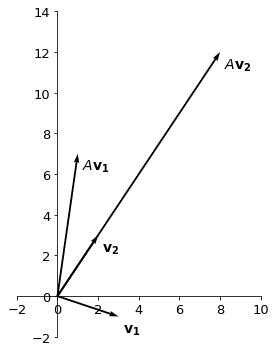

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np

X = np.array((0,0,0,0))
Y= np.array((0,0,0,0))
U = np.array((3,2,1,8))
V = np.array((-1,3,7,12))

fig, ax = plt.subplots(figsize=(5, 5))
q = ax.quiver(X, Y, U, V,units='xy', scale=1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_aspect('equal')

ax.annotate('$\mathbf{v_1}$', (3+0.2,-1-0.8),fontsize=14)
ax.annotate('$\mathbf{v_2}$', (2+0.2,3-0.8),fontsize=14)
ax.annotate('$A\mathbf{v_1}$', (1+0.2,7-0.8),fontsize=14)
ax.annotate('$A\mathbf{v_2}$', (8+0.2,12-0.8),fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=13)

loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.set_ylim(-2,14)
ax.set_xlim(-2,10)

plt.tight_layout()
plt.savefig('lin_trans.png')

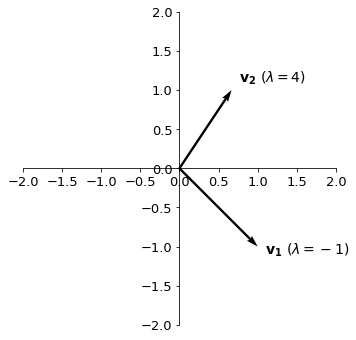

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np

X = np.array((0,0))
Y= np.array((0,0))
U = np.array((1,2/3))
V = np.array((-1,1))

fig, ax = plt.subplots(figsize=(5, 5))
q = ax.quiver(X, Y, U, V,units='xy', scale=1)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_aspect('equal')

ax.annotate('$\mathbf{v_1}\ (\lambda=-1)$', (1+0.1,-1-0.1),fontsize=14)
ax.annotate('$\mathbf{v_2}\ (\lambda=4)$', (2/3+0.1,1+0.1),fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=13)

#loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)

ax.set_ylim(-2,2)
ax.set_xlim(-2,2)

plt.tight_layout()
plt.savefig('eigenvec_01.png')

# 05 - From table arrangements to powerful tools - part 2
  

## Linear transformations

In general terms, a given matrix $A$ is a representation of what we call a *linear transformation*, a function from a special kind of set called *vector space* into another vector space. Vector spaces are generalised sets with particular properties, but for the moment you can think of two-dimensional and three-dimensional cartesian spaces as usual vector spaces. Then vectors are gonna be represented as arrays of real numbers as before: $\mathbf{n_{0}} = \begin{pmatrix} 7.6  \\ 2.2  \end{pmatrix}$ or $\mathbf{v} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$.  
  
Back to linear transformations, they are usually denoted as:  
  
$$\begin{align}
A:V &\longrightarrow W \\
  \mathbf{v} &\rightarrow A(\mathbf{v}) \end{align}$$
  
where $V$ and $W$ are the domain and codomain vector spaces, and the transformation $A$ is a function that projects vectors $\mathbf{v}$ into the images $A(\mathbf{v})$. The property that defines linear transformations is the following:  
  
$$A(a\mathbf{v}+b\mathbf{w})=aA(\mathbf{v})+bA(\mathbf{w}),$$  
  
where $a$ and $b$ are constants. In other words,for a linear transformation, the image of the transformation $A$ of a linear combination of two vectors ($\mathbf{v}$ and $\mathbf{w}$) is equal to the linear combination of the images of this vectors by $A$.  
  
If we represent vectors with their components in a cartesian system, the images of the transformation $A$ will be given be the multiplication of the matrix representation of $A$ on the vectors.  
  
````{admonition} Example

Given the matrix $A = \begin{pmatrix} 1 & 2 \\ 3 & 2 \end{pmatrix}$ and the vectors $\mathbf{v_1} = \begin{pmatrix} 3  \\ -1  \end{pmatrix}$ and $\mathbf{v_2} = \begin{pmatrix} 2  \\ 3  \end{pmatrix}$, then we have:  
  
$$\begin{align} A\mathbf{v_1} &= \begin{pmatrix} 1 & 2 \\ 3 & 2 \end{pmatrix}\begin{pmatrix} 3  \\ -1  \end{pmatrix} = \begin{pmatrix} 1  \\ 7  \end{pmatrix} \\  
  A\mathbf{v_2} &= \begin{pmatrix} 1 & 2 \\ 3 & 2 \end{pmatrix}\begin{pmatrix} 2  \\ 3  \end{pmatrix} = \begin{pmatrix} 8  \\ 12  \end{pmatrix} = 4\begin{pmatrix} 2  \\ 3  \end{pmatrix} \end{align}$$  
    
The vectors and their respective transformations are given by:  
  
```{image} lin_trans.png
```  
  
We see that under the transformation $A$, vector $\mathbf{v_1}$ gets rotated (counterclockwise) and stretched, while vector $\mathbf{v_2}$ only gets stretched without changing the direction.

````  
  
## Eigenvalues and eigenvectors  

  
As seen on the previous example, there might be some vectors that upon application of $A$ do not have their direction changed, only their magnitude (or *module* of the vector). For these vectors, we have, in general:  
  
$$A\mathbf{v} = \lambda\mathbf{v}, \quad \mbox{for some constant }\ \lambda$$  
  
But this is equivalent to:  
  
$$\begin{align}
A\mathbf{v} - \lambda\mathbf{v} = 0 \\  
A\mathbf{v} - \lambda I\mathbf{v} = 0 \\
\left(A - \lambda I \right)\mathbf{v} = 0 \end{align},$$  
  
where $I$ is the identity matrix. The equation $\left(A - \lambda I \right)\mathbf{v} = 0$ defines a system of linear equations where $A - \lambda I$ is the coefficient matrix, $\mathbf{v}$ is the vector of variables, and $\mathbf{b}=0$. See that since $\mathbf{b}=0$ we already know one possible solution for this system, which is $\mathbf{v}=0$ (all the variables equal to $0$). Therefore, either this system has an unique solution (the null solution) or it has infinite solutions, but definitely it is not inconsistent.  Thus, if we want to know all possible non-zero vectors $\mathbf{v}$ that satisfy $A\mathbf{v} = \lambda\mathbf{v}$, we have to impose that the system assumes infinite solutions. This criterium should be defined by the determinant of the matrix of coefficients, as:  
  
$$\mbox{det}(A-\lambda I) = 0.$$  
  
  
The determinant then defines a polynomial in the variable $\lambda$, $\mbox{det}(A-\lambda I)=p(\lambda)$, called *characteristic polynomial*. Since we are interested in the condition $p(\lambda)=0$, what we want to know are the roots $\lambda$ of this polynomial.  
  
The solutions $\lambda$ for these equations are called **eigenvalues** and their corresponding vectors are **eigenvectors**. In summary, the eigenvectors are all the vectors that, upon application of $A$, remain on the same direction, only changing magnitude, with the eigenvalue being the stretching/compressing factor. 
  
````{admonition} Example  

Let us calculate the eigenvalues and eigenvectors of $A = \begin{pmatrix} 1 & 2 \\ 3 & 2 \end{pmatrix}$. First we need to obtain matrix $(A-\lambda I)$ and to calculate its determinant. We have:  
  
$$A-\lambda I = \begin{pmatrix} 1 & 2 \\ 3 & 2 \end{pmatrix} - \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} 1 -\lambda & 2 \\ 3 & 2 -\lambda  \end{pmatrix}$$  
  
The characteristic polynomial will be given by $p(\lambda)=\mbox{det}(A-\lambda I)$, and applying the rule for the calculus of determinants of matrices size 2, we have:  
  
$$p(\lambda)=\mbox{det}(A-\lambda I) = \mbox{det}\begin{pmatrix} 1 -\lambda & 2 \\ 3 & 2 -\lambda  \end{pmatrix} = (1 -\lambda)(2 -\lambda) - 3\cdot 2 $$  
  
$$p(\lambda) = 2 -\lambda -2\lambda +\lambda^2 - 6 = \lambda^2 - 3\lambda -4.$$  
  
Thus, calculating the roots of this 2nd-degree polynomial, we find $\lambda_1=-1$ and $\lambda_2=4$. For each of the eigenvalues, to obtain the eigenvectors we have to solve the linear system  $A\mathbf{v} = \lambda\mathbf{v}$ for some general vector $\mathbf{v} = \begin{pmatrix} x  \\ y  \end{pmatrix}$ (with coordinates $x$ and $y$ to be specified). Thus:  
  
- $\mathbf{\lambda_1 = -1}$:  
    
    $\begin{align}
A\mathbf{v} = \lambda\mathbf{v} \longrightarrow \begin{pmatrix} 1 & 2 \\ 3 & 2 \end{pmatrix}\begin{pmatrix} x  \\ y \end{pmatrix}= -1\begin{pmatrix} x  \\ y \end{pmatrix}\longrightarrow \cases{x + 2y = -x \\ 3x + 2y = -y} \longrightarrow \cases{2x + 2y = 0 \\ 3x + 3y = 0}
\end{align}$  
    
    Note that both equations correspond to the same linear equation $x + y = 0$, which is exactly what we would expect since we built the system to be underdetermined when we did $\mbox{det}(A-\lambda I) = 0$. The eigenvector corresponding to $\lambda_1$ will be such that $x + y = 0$ or $x = -y$. Thus, we can choose $\mathbf{v_1} = \begin{pmatrix} 1  \\ -1  \end{pmatrix}$.  
    
    ```{note}  
    Remember that infinite solutions are possible for the same system. The important is that the condition $x = -y$ holds. In fact, multiplying a non-zero constant for the vector $\begin{pmatrix} 1  \\ -1  \end{pmatrix}$ would still give a vector in the same direction. So if $\mathbf{v_1}$ is an eigenvector, $k\mathbf{v_1}\ (k \in {\rm I\!R})$ also is.  
    
    ```  
    <br />  
    
    
- $\mathbf{\lambda_1 = 4}$:  
    
    $\begin{align}
A\mathbf{v} = \lambda\mathbf{v} \longrightarrow \begin{pmatrix} 1 & 2 \\ 3 & 2 \end{pmatrix}\begin{pmatrix} x  \\ y \end{pmatrix}= 4\begin{pmatrix} x  \\ y \end{pmatrix}\longrightarrow \cases{x + 2y = 4x \\ 3x + 2y = 4y} \longrightarrow \cases{-3x + 2y = 0 \\ 3x - 2y = 0}
\end{align}$  
    
    Since the eigenvector needs to satisfy $3x=2y$, we choose $\mathbf{v_2} = \begin{pmatrix} 2/3  \\ 1  \end{pmatrix}$.  
    
    The representation of these vectors on the cartesian plane will be:  
      
```{image} eigenvec_01.png
```

````  
  
  
  
````{admonition} Example  
  
Let us calculate the eigenvalues and eigenvectors of matrix $A = \begin{pmatrix} -2 & 1 \\ 0 & -1 \end{pmatrix}$. We have:  
  
$$p(\lambda)=\mbox{det}(A-\lambda I) = \mbox{det}\begin{pmatrix} -2 -\lambda & 1 \\ 0 & -1 -\lambda  \end{pmatrix} = (-2 -\lambda)(-1 -\lambda) - 1\cdot 0 $$  
  
$$p(\lambda)=(-2 -\lambda)(-1 -\lambda)$$  
  
Since we need $p(\lambda)=0$ either one of the two factors has to be zero. So, $\lambda_1=-2$ and $\lambda_2=-1$.   
For the eigenvectors:  
  
- $\mathbf{\lambda_1 = -2}$:  
    
    $\begin{align}
A\mathbf{v} = \lambda\mathbf{v} \longrightarrow \begin{pmatrix} -2 & 1 \\ 0 & -1 \end{pmatrix}\begin{pmatrix} x  \\ y \end{pmatrix}= -2\begin{pmatrix} x  \\ y \end{pmatrix}\longrightarrow \cases{-2x + y = -2x \\ -y = -2y} \longrightarrow \cases{y = 0 \\ y = 0}
\end{align}$  
    
    Since $y=0$, we choose $\mathbf{v_1} = \begin{pmatrix} 1  \\ 0  \end{pmatrix}$.  
      
- $\mathbf{\lambda_2 = -1}$:  
    
    $\begin{align}
A\mathbf{v} = \lambda\mathbf{v} \longrightarrow \begin{pmatrix} -2 & 1 \\ 0 & -1 \end{pmatrix}\begin{pmatrix} x  \\ y \end{pmatrix}= -1\begin{pmatrix} x  \\ y \end{pmatrix}\longrightarrow \cases{-2x + y = -x \\ -y = -y} \longrightarrow \cases{-x + y = 0 \\ y = y}
\end{align}$  
    
    The second equation is trivial and provides no information. From the first equation, since $x=y$, we choose $\mathbf{v_2} = \begin{pmatrix} 1  \\ 1  \end{pmatrix}$.  
      
```{tip}  
  
Note that the two eigenvalues $\lambda_1 = -2$ and $\lambda_2 = -1$ correspond to the elements of the main diagonal of the matrix $A$. Whenever the matrix $A$ is *triangular*, meaning all the elements *below* the main diagonal are $0$, the eigenvalues will correspond to the elements of the main diagonal.  
  
```
  

````
                             

## Vector decomposition  
  
Now suppose matrix $A$ has eigenvalues $\lambda_1$ and $\lambda_2$, with corresponding eigenvectors $\mathbf{u_1}$ and $\mathbf{u_2}$. If $\lambda_1 \ne \lambda_2$, then the vectors $\mathbf{u_1}$ and $\mathbf{u_2}$ are *linearly independent* meaning one can not be written as a multiple (multiplied by a real constant) of the other. Geometrically, this means that the directions corresponding to this two eigenvectors are not on the same line.  
  
In two dimensions, this is enough to say that any given vector $\mathbf{v}$ can be written as a linear combination of $\mathbf{u_1}$ and $\mathbf{u_2}$ (or that $\mathbf{u_1}$ and $\mathbf{u_2}$ consitute a *basis* of this space). We have:  
  
$$\mathbf{v}= a_1\mathbf{u_1} + a_2\mathbf{u_2},$$  
  
for constants $a_1$ and $a_2$ to be determined.  
  
But given that $A$ is a linear transformation, it should hold that:  
  
$$A\mathbf{v} = A(a_1\mathbf{u_1} + a_2\mathbf{u_2}) = a_1A(\mathbf{u_1}) + a_2A(\mathbf{u_2}) = a_1\lambda_1\mathbf{u_1} + a_2\lambda_2\mathbf{u_2},$$  
  
with the last step coming from the fact that $\mathbf{u_1}$ and $\mathbf{u_2}$ are eigenvectors of $A$. Since $A\mathbf{v}$ is also a vector in this space, we can go ahead and apply the transformation $A$ again, and we will have:  
  
$$A(A\mathbf{v}) = A(a_1\lambda_1\mathbf{u_1} + a_2\lambda_2\mathbf{u_2})=a_1\lambda_1 A(\mathbf{u_1}) + a_2\lambda_2 A(\mathbf{u_2}) = a_1\lambda_1^2\mathbf{u_1} + a_2\lambda_2^2\mathbf{u_2}.$$
  
  
So, in general:  
  
  
$$A(A(A \cdots A\mathbf{v}) \cdots )) = A^n\mathbf{v} = a_1\lambda_1^n\mathbf{u_1} + a_2\lambda_2^n\mathbf{u_2},$$  
or, in other words, if we know the eigenvectors and eigenvalues of $A$ (with $\lambda_1 \ne \lambda_2$), and we know the coeffiencients $a_1$ and $a_2$ of the expansion of $\mathbf{v}$ into the eigenvectors, then it is easy to calculate what is going to be the image ov vector $\mathbf{v}$ by any number of successive applications of $A$. This is also equivalent of applying the $n$-th power of matrix $A$ to $\mathbf{v}$.  
  
This fact will have many important applications, as we will se next.  
  


## Structured models revisited  
  
Let us considered a structured population model defined by the projection matrix $P=\begin{pmatrix} 1.5 & 2  \\ 0.08 & 0  \end{pmatrix}$ and an initial population vector given by $\mathbf{n_0} = \begin{pmatrix} 105  \\ 1 \end{pmatrix}$. If we calculate the eigenvalues and eigenvectors, we will have:  
  
$$p(\lambda)=\mbox{det}(P-\lambda I) = \mbox{det}\begin{pmatrix} 1.5 -\lambda & 2 \\ 0.08 & -\lambda  \end{pmatrix} = (1.5 -\lambda)(-\lambda) - 0.08\cdot 2 $$  
  
$$p(\lambda)=\lambda^2-1.5\lambda-0.16=(\lambda-1.6)(\lambda+0.1)$$  
  
Thus, we have $\lambda_1=1.6$ and $\lambda_2=-0.1$.  
  
- $\mathbf{\lambda_1 = 1.6}$:  
    
    $\begin{align}
A\mathbf{v} = \lambda\mathbf{v} \longrightarrow \begin{pmatrix} 1.5 & 2  \\ 0.08 & 0 \end{pmatrix}\begin{pmatrix} x  \\ y \end{pmatrix}= 1.6\begin{pmatrix} x  \\ y \end{pmatrix}\longrightarrow \cases{1.5x + 2y = 1.6x \\ 0.08x = 1.6y} \longrightarrow \cases{x - 20y = 0 \\ x - 20y = 0}
\end{align}$  
    
    Since $x=20y$, we choose $\mathbf{u_1} = \begin{pmatrix} 20  \\ 1  \end{pmatrix}$.  
  
  <br />
  
- $\mathbf{\lambda_2 = -0.1}$:  
    
    $\begin{align}
A\mathbf{v} = \lambda\mathbf{v} \longrightarrow \begin{pmatrix} 1.5 & 2  \\ 0.08 & 0 \end{pmatrix}\begin{pmatrix} x  \\ y \end{pmatrix}= -0.1\begin{pmatrix} x  \\ y \end{pmatrix}\longrightarrow \cases{1.5x + 2y = -0.1x \\ 0.08x = -0.1y} \longrightarrow \cases{0.8x + y = 0 \\ 0.08x + 0.1y = 0}
\end{align}$  
    
    Since $-\displaystyle\frac{4}{5}x=y$, we choose $\mathbf{u_2} = \begin{pmatrix} 5  \\ -4  \end{pmatrix}$.  

<br />
      
We can also note that the initial population vector can be decomposed into the eigenvectors $\mathbf{u_1}$ and $\mathbf{u_2}$ of the matrix $P$ according to:  
  
$$\mathbf{n_0}=\begin{pmatrix} 105  \\ 1 \end{pmatrix} = 5\begin{pmatrix} 20  \\ 1 \end{pmatrix} + \begin{pmatrix} 5  \\ -4 \end{pmatrix} = 5\mathbf{u_1} + \mathbf{u_2}$$  
  
We know that to find the population vector for the following step, we have to apply the projection matrix on the current population vector. Thus:  
  
$$\mathbf{n_1} = P\mathbf{n_0}= P(5\mathbf{u_1} + \mathbf{u_2})=5P(\mathbf{u_1}) + P(\mathbf{u_2})=5(1.6)\begin{pmatrix} 20  \\ 1 \end{pmatrix} + (-0.1)\begin{pmatrix} 5  \\ -4 \end{pmatrix} = \begin{pmatrix} 159.5  \\ 8.4 \end{pmatrix}$$  
  
If we perform successive applications of $P$, we will finally have:  
  
$$\mathbf{n_t} = P^t\mathbf{n_0} = P^t(5\mathbf{u_1} + \mathbf{u_2})=5(1.6)^t\begin{pmatrix} 20  \\ 1 \end{pmatrix} + (-0.1)^t\begin{pmatrix} 5  \\ -4 \end{pmatrix}.$$  
  
<br />  
  
By decomposing into eigenvalues and eigenvectors, we know the behaviour of our population for any time $t$, which is much easier than applying $P$ a number $t$ of times, or than calculating $P^t$. Furthermore, as $t\rightarrow\infty$ the first term will dominate (with the second term dying out) and the proportions for each age class in this population will be dictated by the vector $\begin{pmatrix} 20  \\ 1 \end{pmatrix}$ (or, if we divide by the sum of the components: $\displaystyle\frac{1}{21}\begin{pmatrix} 20  \\ 1 \end{pmatrix} = \begin{pmatrix} 95\%  \\ 5\% \end{pmatrix}$.  
  
In general the eigenvector corresponding to the **largest eigenvalue** (also called *dominant eigenvalue*) of the projection matrix, which is always *real* and *positive*, will correspond to the stable age distribution, for which our population vector converges after we wait enough time.  
  
As we have seen, after enough time, the dominant eigenvalue will also correspond to the growth factor for each of the age classes. Thus, if $\lambda_1>1$ the population size will increase, whereas if $0<\lambda_1<1$ the population size will decrease.
  
